In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.linalg import eig
import seaborn as sns

In [37]:
df=pd.read_excel('PCA-DATA-AD-FOR-MINITAB (3).xlsx')
df

RMSDs       Bond      Angle    Dihedral  Planarity     Coulomb        VdW
0    0.863  52561.595  36343.434  109490.414    909.036 -797966.032  74139.587
1    0.905  50982.575  36734.896  109634.671    970.856 -791741.020  72067.861
2    0.974  50312.119  36265.590  109371.295    954.854 -787948.091  71137.821
3    0.997  51780.050  35620.296  109533.245   1056.121 -781637.580  65249.586
4    0.878  50430.996  35727.274  109358.162    890.862 -781861.471  66819.872
..     ...        ...        ...         ...        ...         ...        ...
995  1.624  50735.712  35580.405  109099.992   1051.210 -784961.161  68982.221
996  1.571  50217.239  35616.304  109412.326    983.694 -783989.522  68386.712
997  1.500  50793.303  35502.861  109430.151    958.620 -785506.249  68574.969
998  1.511  50459.908  36195.892  109103.947    998.371 -786980.445  70428.611
999  1.501  49722.398  35726.154  109391.413    957.919 -785556.345  69378.298

[1000 rows x 7 columns]

In [38]:
df = df.drop('RMSDs', axis=1)

In [39]:
df

Bond      Angle    Dihedral  Planarity     Coulomb        VdW
0    52561.595  36343.434  109490.414    909.036 -797966.032  74139.587
1    50982.575  36734.896  109634.671    970.856 -791741.020  72067.861
2    50312.119  36265.590  109371.295    954.854 -787948.091  71137.821
3    51780.050  35620.296  109533.245   1056.121 -781637.580  65249.586
4    50430.996  35727.274  109358.162    890.862 -781861.471  66819.872
..         ...        ...         ...        ...         ...        ...
995  50735.712  35580.405  109099.992   1051.210 -784961.161  68982.221
996  50217.239  35616.304  109412.326    983.694 -783989.522  68386.712
997  50793.303  35502.861  109430.151    958.620 -785506.249  68574.969
998  50459.908  36195.892  109103.947    998.371 -786980.445  70428.611
999  49722.398  35726.154  109391.413    957.919 -785556.345  69378.298

[1000 rows x 6 columns]

In [40]:
meanbycolumn=np.mean(df.T,axis=1)
print(meanbycolumn)
scaled_data=df-meanbycolumn

Bond          49826.252702
Angle         35740.931981
Dihedral     109161.152948
Planarity       981.414370
Coulomb     -783460.338452
VdW           68471.648582
dtype: float64


In [41]:
df.T

0           1           2           3           4    \
Bond        52561.595   50982.575   50312.119   51780.050   50430.996   
Angle       36343.434   36734.896   36265.590   35620.296   35727.274   
Dihedral   109490.414  109634.671  109371.295  109533.245  109358.162   
Planarity     909.036     970.856     954.854    1056.121     890.862   
Coulomb   -797966.032 -791741.020 -787948.091 -781637.580 -781861.471   
VdW         74139.587   72067.861   71137.821   65249.586   66819.872   

                  5           6           7           8           9    ...  \
Bond        49260.098   47755.194   48965.129   50501.611   49481.884  ...   
Angle       35483.626   35199.124   35114.714   35644.667   35186.755  ...   
Dihedral   109427.517  109588.475  109480.172  109729.097  109325.710  ...   
Planarity     955.776     937.922    1018.092     994.706    1007.454  ...   
Coulomb   -783819.150 -782193.643 -783436.939 -783737.811 -782575.192  ...   
VdW         69630.150   69486.808   69647.520   67603.227   68501.734  ...   

                  990         991         992         993         994  \
Bond        50307.626   51179.280   49117.294   50852.004   50615.240   
Angle       36101.283   35595.343   35714.128   35924.197   35854.390   
Dihedral   109075.774  109270.091  108706.301  108783.880  109313.440   
Planarity     924.532     991.660     977.484     979.721     980.711   
Coulomb   -784308.886 -788416.102 -779856.439 -784785.860 -786967.286   
VdW         68113.169   70668.463   66496.820   68621.476   68804.167   

                  995         996         997         998         999  
Bond        50735.712   50217.239   50793.303   50459.908   49722.398  
Angle       35580.405   35616.304   35502.861   36195.892   35726.154  
Dihedral   109099.992  109412.326  109430.151  109103.947  109391.413  
Planarity    1051.210     983.694     958.620     998.371     957.919  
Coulomb   -784961.161 -783989.522 -785506.249 -786980.445 -785556.345  
VdW         68982.221   68386.712   68574.969   70428.611   69378.298  

[6 rows x 1000 columns]

In [42]:
scaled_data

Bond       Angle    Dihedral  Planarity       Coulomb          VdW
0    2735.342298  602.502019  329.261052  -72.37837 -14505.693548  5667.938418
1    1156.322298  993.964019  473.518052  -10.55837  -8280.681548  3596.212418
2     485.866298  524.658019  210.142052  -26.56037  -4487.752548  2666.172418
3    1953.797298 -120.635981  372.092052   74.70663   1822.758452 -3222.062582
4     604.743298  -13.657981  197.009052  -90.55237   1598.867452 -1651.776582
..           ...         ...         ...        ...           ...          ...
995   909.459298 -160.526981  -61.160948   69.79563  -1500.822548   510.572418
996   390.986298 -124.627981  251.173052    2.27963   -529.183548   -84.936582
997   967.050298 -238.070981  268.998052  -22.79437  -2045.910548   103.320418
998   633.655298  454.960019  -57.205948   16.95663  -3520.106548  1956.962418
999  -103.854702  -14.777981  230.260052  -23.49537  -2096.006548   906.649418

[1000 rows x 6 columns]

In [43]:
cov_mat=np.cov(scaled_data.T) #transpose due to we want to do this feature by feature
cov_mat

array([[ 1.12589283e+06, -1.01908825e+04, -1.40401400e+05,
         1.36040936e+03, -2.55735240e+05, -8.77591333e+05],
       [-1.01908825e+04,  9.57487823e+04, -1.51828107e+04,
        -4.39891915e+00, -5.02310840e+04, -8.15971842e+03],
       [-1.40401400e+05, -1.51828107e+04,  1.21728763e+05,
         8.88291147e+02, -1.46119105e+05,  1.98665895e+05],
       [ 1.36040936e+03, -4.39891915e+00,  8.88291147e+02,
         1.46801915e+03,  1.17216197e+03, -3.95231153e+03],
       [-2.55735240e+05, -5.02310840e+04, -1.46119105e+05,
         1.17216197e+03,  2.70353205e+06, -1.58763002e+06],
       [-8.77591333e+05, -8.15971842e+03,  1.98665895e+05,
        -3.95231153e+03, -1.58763002e+06,  2.17399631e+06]])

In [44]:
Eval,Evec=eig(cov_mat)
print(Eval)
print(Evec)

[4.11547808e+06 1.79785833e+06 1.47984975e+05 1.12191248e+05
 4.74116296e+04 1.44249458e+03]
[[-1.35953282e-01 -7.47043734e-01 -5.10380298e-01 -5.72952554e-02
  -3.99581856e-01  2.43100769e-03]
 [ 7.88222949e-03 -1.33876946e-02  4.04378835e-01  6.95383336e-01
  -5.93867187e-01  4.21630053e-04]
 [ 6.46028692e-02  6.61445011e-02  4.05844398e-01 -7.15037603e-01
  -5.61558518e-01 -1.07217828e-02]
 [-8.78768856e-04 -1.09774296e-03  9.33528908e-03 -8.04119638e-03
  -2.33613609e-03  9.99920375e-01]
 [-7.30853735e-01  5.18538734e-01 -3.52646120e-01 -6.70864049e-03
  -2.69369033e-01  2.53599793e-03]
 [ 6.65682425e-01  4.10472545e-01 -5.35568483e-01  4.20812227e-02
  -3.15821156e-01  5.63629190e-03]]


In [45]:
projected_data=Evec.T.dot(scaled_data.T)
T=projected_data.T
print(T)

[[ 1.40287924e+04 -7.22485904e+03  1.06033470e+03  3.63222966e+02
   4.81800194e+02 -7.38394547e+01]
 [ 8.32713118e+03 -3.66350568e+03  9.97982171e+02  4.93321054e+02
  -2.23412233e+02 -1.31348618e+01]
 [ 5.00639431e+03 -1.58874139e+03  2.03891648e+02  3.29257232e+02
  -2.56837638e+02 -2.37626015e+01]
 ...
 [ 1.44808784e+03 -1.71989755e+03  1.85271533e+02 -3.95045287e+02
   1.22436067e+02 -2.80322457e+01]
 [ 3.78912652e+03 -1.50529381e+03  3.07771290e+01  4.26800727e+02
  -1.61140547e+02  2.14039038e+01]
 [ 2.16431381e+03 -6.21667813e+02  3.93835632e+02 -1.16567374e+02
   1.99285198e+02 -2.64263274e+01]]


In [46]:
np.savetxt('T1.csv',T)

In [59]:
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit_transform(df)

array([[14028.79240534,  7224.85904416, -1060.33470323,   363.22296559,
         -481.80019397],
       [ 8327.13118351,  3663.50567538,  -997.98217088,   493.3210544 ,
          223.41223294],
       [ 5006.39430835,  1588.74138666,  -203.89164752,   329.25723166,
          256.83763786],
       ...,
       [ 1448.08783649,  1719.89755098,  -185.27153327,  -395.04528719,
         -122.43606703],
       [ 3789.12651819,  1505.29380936,   -30.77712899,   426.80072664,
          161.14054657],
       [ 2164.31380807,   621.66781316,  -393.83563153,  -116.56737436,
         -199.28519836]])

In [61]:
pca.components_.T

array([[-0.13595328,  0.74704373,  0.5103803 , -0.05729526,  0.39958186],
       [ 0.00788223,  0.01338769, -0.40437884,  0.69538334,  0.59386719],
       [ 0.06460287, -0.0661445 , -0.4058444 , -0.7150376 ,  0.56155852],
       [-0.00087877,  0.00109774, -0.00933529, -0.0080412 ,  0.00233614],
       [-0.73085373, -0.51853873,  0.35264612, -0.00670864,  0.26936903],
       [ 0.66568243, -0.41047254,  0.53556848,  0.04208122,  0.31582116]])

In [48]:
pca.explained_variance_ratio_

array([0.66140076, 0.28893481, 0.02378275, 0.01803032, 0.00761955])

In [49]:
pcdf=pd.DataFrame(data=pca.fit_transform(df),columns=['PC1','PC2','PC3','PC4','PC5'])

In [50]:
pcdf

PC1          PC2          PC3         PC4         PC5
0    14028.792405  7224.859044 -1060.334703  363.222966 -481.800194
1     8327.131184  3663.505675  -997.982171  493.321054  223.412233
2     5006.394308  1588.741387  -203.891648  329.257232  256.837638
3    -3719.643726  1810.824523  -188.593070 -610.308670  391.585340
4    -2337.614456   287.390606   -85.742698 -264.522190  252.973382
..            ...          ...          ...         ...         ...
995   1307.839056  1250.037527   297.441333  -89.010363   -9.136219
996    292.301262   583.070471   -84.113718 -288.706522   53.901824
997   1448.087836  1719.897551  -185.271533 -395.045287 -122.436067
998   3789.126518  1505.293809   -30.777129  426.800727  161.140547
999   2164.313808   621.667813  -393.835632 -116.567374 -199.285198

[1000 rows x 5 columns]

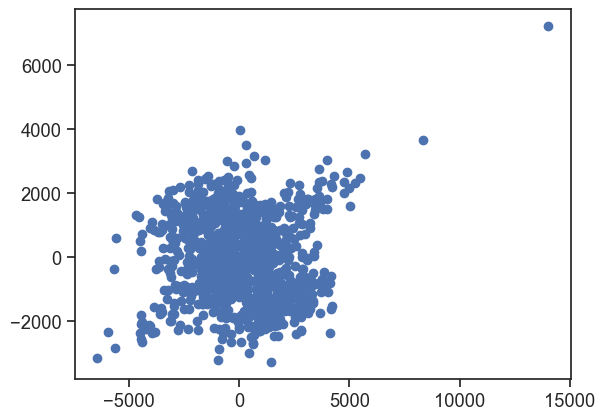

In [51]:
plt.scatter(pcdf['PC1'],pcdf['PC2'])

In [52]:
loadings=pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5'],index=['Bond','Angle','Dihedral','Planarity','Coulomb','VdW'])
loadings

PC1       PC2       PC3       PC4       PC5
Bond      -0.135953  0.747044  0.510380 -0.057295  0.399582
Angle      0.007882  0.013388 -0.404379  0.695383  0.593867
Dihedral   0.064603 -0.066145 -0.405844 -0.715038  0.561559
Planarity -0.000879  0.001098 -0.009335 -0.008041  0.002336
Coulomb   -0.730854 -0.518539  0.352646 -0.006709  0.269369
VdW        0.665682 -0.410473  0.535568  0.042081  0.315821

In [53]:
loadings.to_excel('PCA.xlsx')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

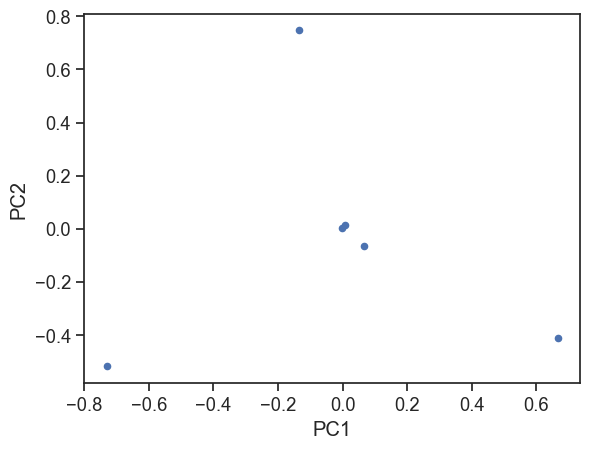

In [54]:
loadings.plot('PC1','PC2',kind='scatter')

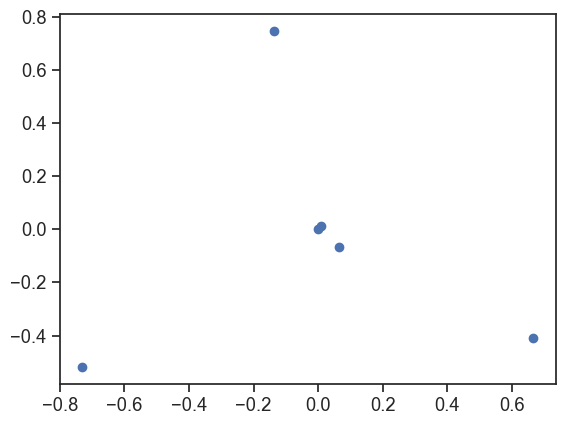

In [55]:
plt.scatter(loadings['PC1'],loadings['PC2'])

In [56]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA()
components = pca.fit_transform(df[features])
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5)
)
fig.update_traces(diagonal_visible=False)
fig.show()

NameError: name 'features' is not defined

In [58]:
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston

pca = PCA()
components = pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(5)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(5)

)
fig.update_traces(diagonal_visible=False)
fig.show()

<AxesSubplot:>

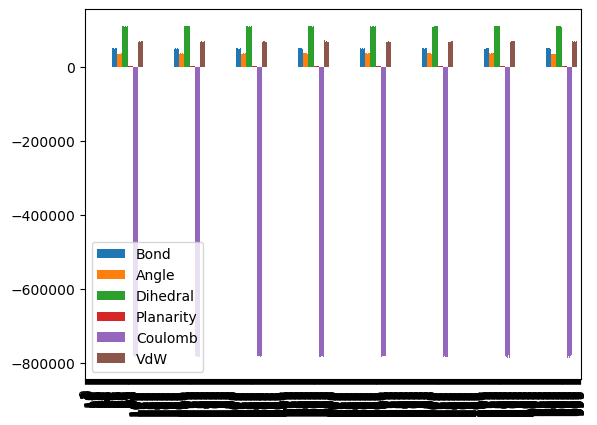

In [44]:
df.plot(kind='bar')

In [47]:
import plotly.express as px
from sklearn.decomposition import PCA

df = px.data.df()
df

AttributeError: module 'plotly.express.data' has no attribute 'df'

<AxesSubplot:ylabel='Frequency'>

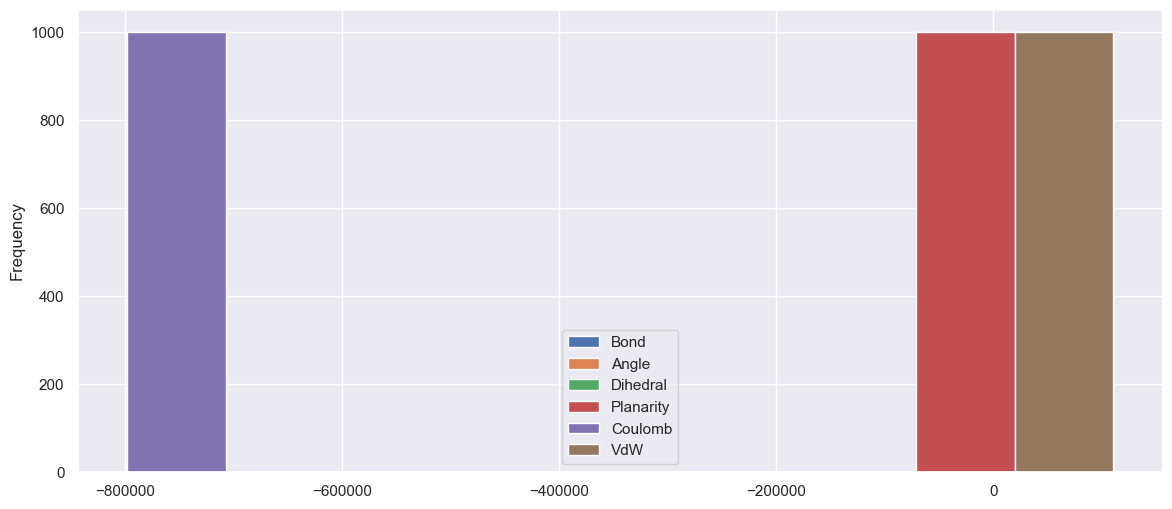

In [57]:
df.plot(kind='hist',bins=10)

<AxesSubplot:ylabel='Count'>

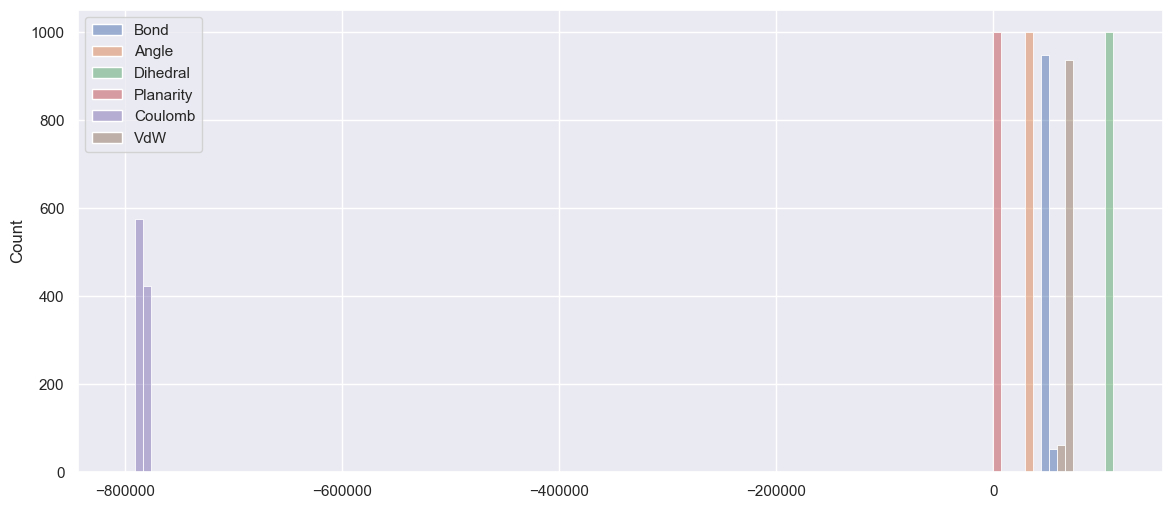

In [59]:
sns.histplot(df)

In [63]:
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

pca=PCA(n_components=5)
pca.fit_transform(df)

loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

fig = px.scatter(components, x=0, y=1)

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0],
        y1=loadings[i, 1]
    )
    fig.add_annotation(
        x=loadings[i, 0],
        y=loadings[i, 1],
        ax=0, ay=0,
        xanchor="center",
        yanchor="bottom",
        text=feature,
    )
fig.show()

In [67]:
import plotly.express as px
from sklearn.decomposition import PCA

pca=PCA(n_components=5)
pca.fit_transform(df)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [69]:
import plotly.express as px
from sklearn.decomposition import PCA
pca=PCA(n_components=5)
pca.fit_transform(df)


fig = px.scatter(components, x=0, y=1)
fig.show()

In [75]:
import plotly.express as px
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
pca.fit_transform(df)

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [76]:
df

Bond      Angle    Dihedral  Planarity     Coulomb        VdW
0    52561.595  36343.434  109490.414    909.036 -797966.032  74139.587
1    50982.575  36734.896  109634.671    970.856 -791741.020  72067.861
2    50312.119  36265.590  109371.295    954.854 -787948.091  71137.821
3    51780.050  35620.296  109533.245   1056.121 -781637.580  65249.586
4    50430.996  35727.274  109358.162    890.862 -781861.471  66819.872
..         ...        ...         ...        ...         ...        ...
995  50735.712  35580.405  109099.992   1051.210 -784961.161  68982.221
996  50217.239  35616.304  109412.326    983.694 -783989.522  68386.712
997  50793.303  35502.861  109430.151    958.620 -785506.249  68574.969
998  50459.908  36195.892  109103.947    998.371 -786980.445  70428.611
999  49722.398  35726.154  109391.413    957.919 -785556.345  69378.298

[1000 rows x 6 columns]

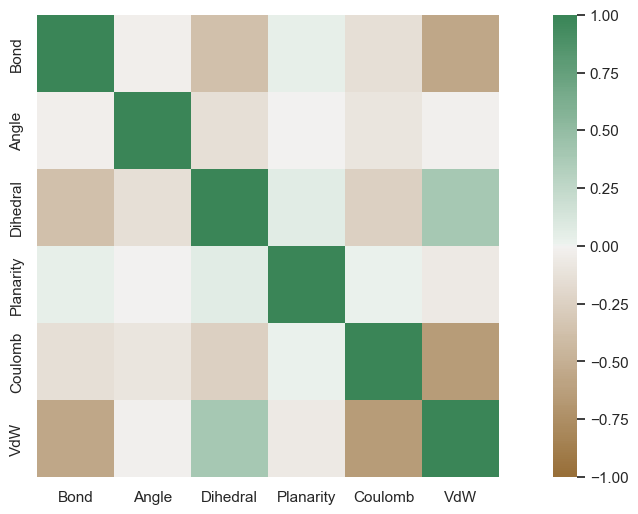

In [77]:
cor=df.corr()
axis_corr= sns.heatmap(
cor,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(50,500,n=500),
square=True
)
plt.show()

In [78]:
pcdf

PC1          PC2          PC3         PC4         PC5
0    14028.792405  7224.859044 -1060.334703  363.222966 -481.800194
1     8327.131184  3663.505675  -997.982171  493.321054  223.412233
2     5006.394308  1588.741387  -203.891648  329.257232  256.837638
3    -3719.643726  1810.824523  -188.593070 -610.308670  391.585340
4    -2337.614456   287.390606   -85.742698 -264.522190  252.973382
..            ...          ...          ...         ...         ...
995   1307.839056  1250.037527   297.441333  -89.010363   -9.136219
996    292.301262   583.070471   -84.113718 -288.706522   53.901824
997   1448.087836  1719.897551  -185.271533 -395.045287 -122.436067
998   3789.126518  1505.293809   -30.777129  426.800727  161.140547
999   2164.313808   621.667813  -393.835632 -116.567374 -199.285198

[1000 rows x 5 columns]

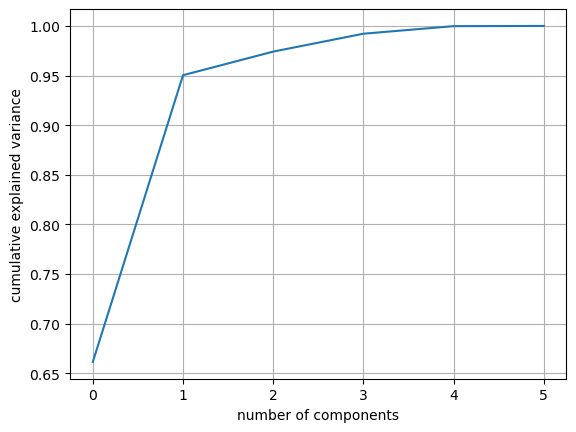

In [28]:
pca=PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show();

In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scaler= StandardScaler()
scaler.fit(df)

StandardScaler()

In [63]:
scaled_data=scaler.transform(df)

In [64]:
scaled_data

array([[-3.69548969,  2.57917263,  1.94809052, ..., -1.88999299,
        -8.82652982,  3.84603274],
       [-3.42136439,  1.09030406,  3.21381808, ..., -0.2757073 ,
        -5.03868928,  2.44024365],
       [-2.97101568,  0.4581266 ,  1.69639483, ..., -0.69356236,
        -2.73074028,  1.80915629],
       ...,
       [ 0.46207735,  0.91183822, -0.7697631 , ..., -0.59522202,
        -1.24491052,  0.07010904],
       [ 0.53387207,  0.59747784,  1.47103789, ...,  0.442783  ,
        -2.14194001,  1.32791519],
       [ 0.46860415, -0.0979253 , -0.04778215, ..., -0.61352701,
        -1.2753933 ,  0.61521546]])

In [65]:
from sklearn.decomposition import PCA

In [66]:
pca=PCA(n_components=5)

In [67]:
pca.fit(scaled_data)

PCA(n_components=5)

In [68]:
xpca=pca.transform(scaled_data)

In [69]:
scaled_data.shape

(1000, 7)

In [70]:
xpca.shape

(1000, 5)

In [71]:
xpca

array([[ 5.89127567,  7.36862238,  3.99691413, -2.48939254,  3.03235115],
       [ 4.12029326,  4.30449225,  2.52853351,  0.13184493,  3.79193896],
       [ 2.65669474,  2.16710655,  1.56490707, -0.60086008,  2.97226847],
       ...,
       [ 0.543507  ,  0.87246823,  0.73166939, -1.02207988, -0.90969966],
       [ 1.32024748,  2.60573718,  0.15517887,  0.88976977,  0.03965552],
       [ 1.2631091 ,  0.8428081 , -0.10169228, -0.50171904, -0.42673775]])

In [72]:
loadings=pd.DataFrame(pca.components_.T,columns=['PC1','PC2','PC3','PC4','PC5'],index=['Bond','Angle','Dihedral','Planarity','Coulomb','VdW'])
loadings

ValueError: Shape of passed values is (7, 5), indices imply (6, 5)

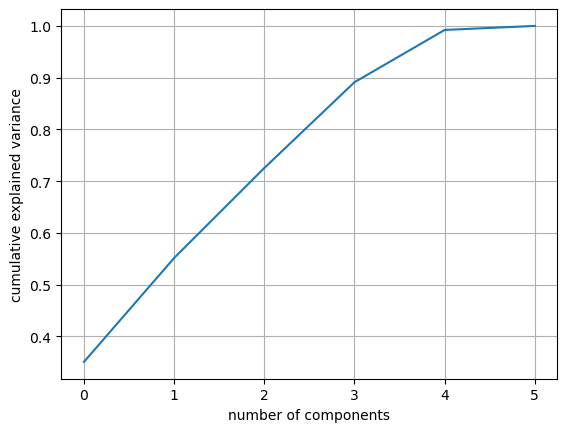

In [48]:
pca=PCA().fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
plt.show();

#### step1: Stadardization of data
    stadardization all about scaling your data(remove of data) in such a way that all the variables and their values lie within a similar range.

### Step2: Computing the covariance matrix
    Need due to notice correlation between diff variables

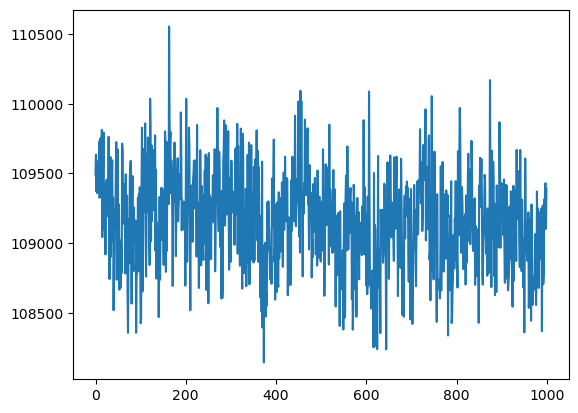

In [60]:
plt.plot(df['Dihedral']);

In [89]:
figure=plt.figure(figsize=(15,8))
ax=figure.add_subplot(111,projection='3d')
ax.scatter{pcdf['PC1'],pcdf['PC2'],s=50,alpha=0.6,edgecolors='w'}
plt.show()

SyntaxError: invalid syntax (3619120538.py, line 3)

In [13]:
# Generic
import pandas as pd
import numpy as np

# Generate data sets
from sklearn.datasets import make_blobs

# PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [14]:
# Create an array with 3 clusters in 3-dimensions
X, y = make_blobs(n_samples=1000, centers=3, n_features=3, random_state=0, cluster_std=[1,2,3], center_box=(10,65))

# Standardize the data
X = StandardScaler().fit_transform(df)

# Prepare the array in a DataFrame
col_name = ['x' + str(idx) for idx in range(0, X.shape[1])]
df = pd.DataFrame(X, columns=col_name)
df['cluster_label'] = y

df.head()

x0        x1        x2        x3        x4        x5  cluster_label
0  2.579173  1.948091  0.944194 -1.889993 -8.826530  3.846033              2
1  1.090304  3.213818  1.357867 -0.275707 -5.038689  2.440244              2
2  0.458127  1.696395  0.602606 -0.693562 -2.730740  1.809156              1
3  1.842249 -0.390056  1.067016  1.950790  1.109125 -2.186361              0
4  0.570217 -0.044161  0.564946 -2.364565  0.972890 -1.120828              2

In [16]:
colors = px.colors.sequential.Plasma
colors[0], colors[1], colors[2] = ['red', 'green', 'blue']
fig = px.scatter_3d(df, x='x0', y='x1', z='x2', color=df['cluster_label'].astype(str), color_discrete_sequence=colors, height=500, width=1000)
fig.update_layout(showlegend=False,
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                    center=dict(x=0, y=0, z=-0.1),
                                    eye=dict(x=1.5, y=-1.4, z=0.5)),
                  margin=dict(l=0, r=0, b=0, t=0),
                  scene=dict(xaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             yaxis=dict(backgroundcolor='white',
                                        color='black',
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10)),
                             zaxis=dict(backgroundcolor='lightgrey',
                                        color='black', 
                                        gridcolor='#f0f0f0',
                                        title_font=dict(size=10),
                                        tickfont=dict(size=10))))
fig.update_traces(marker=dict(size=3, line=dict(color='black', width=0.1)))
fig.show()

In [26]:
# Perform PCA (w/o limits on n_components)
pca = PCA()
_ = pca.fit_transform(df)
PC_components = np.arange(pca.n_components_) + 1

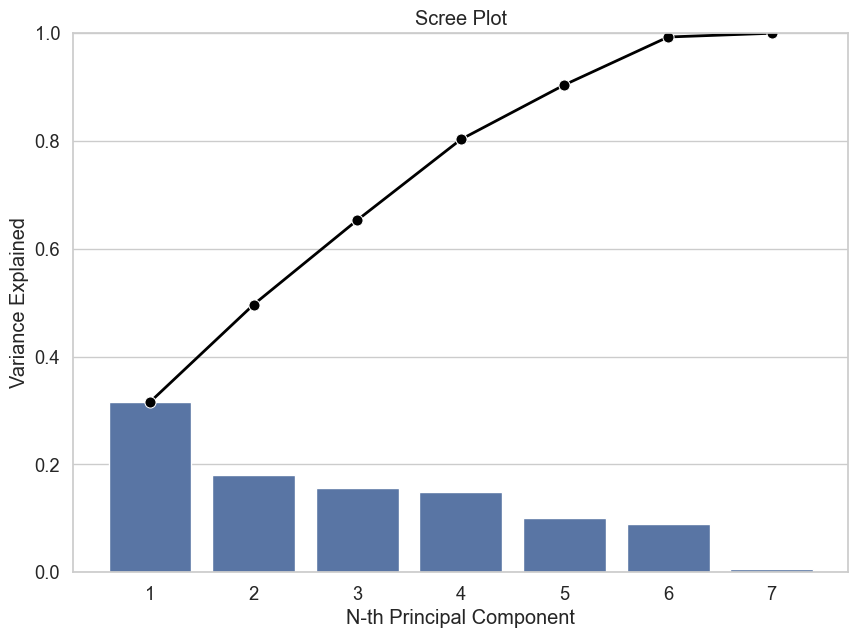

In [27]:
# Scree Plot
_ = sns.set(style='whitegrid', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.barplot(x=PC_components, y=pca.explained_variance_ratio_, color='b')
_ = sns.lineplot(x=PC_components-1, y=np.cumsum(pca.explained_variance_ratio_), color='black', linestyle='-', linewidth=2, marker='o', markersize=8)

plt.title('Scree Plot')
plt.xlabel('N-th Principal Component')
plt.ylabel('Variance Explained')
plt.ylim(0, 1)
plt.show()

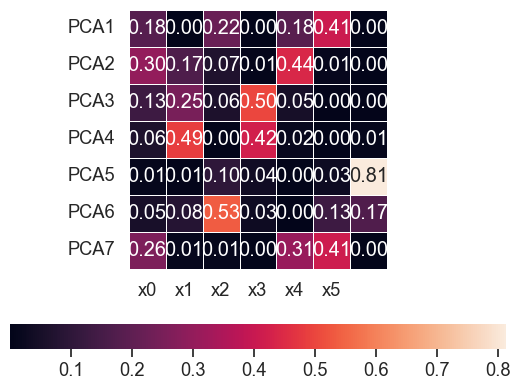

In [31]:
# Feature Weight
_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.5,
                 cbar_kws={"orientation": "horizontal"})

In [32]:
# Perform PCA (Choose n_components to keep)
pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)

# Convert back to DataFrame for readability
df_pca = pd.DataFrame(data=pca_array)
df_pca.columns = ['PC' + str(col+1) for col in df_pca.columns.values]
df_pca['label'] = y

df_pca.head()

PC1       PC2  label
0  5.580593  8.422097      2
1  3.814419  5.184674      2
2  2.404751  2.881970      1
3 -2.188790 -0.582503      0
4 -1.063072 -0.447928      2

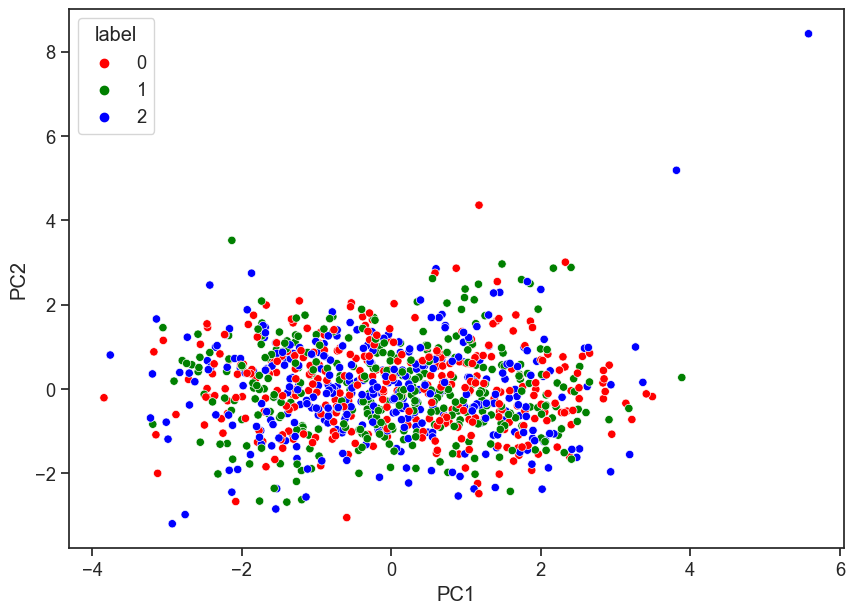

In [33]:
# Plot Principal Component
_ = sns.set(style='ticks', font_scale=1.2)
fig, ax = plt.subplots(figsize=(10, 7))
_ = sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue=df_pca['label'], palette=['red', 'green', 'blue'])

In [35]:
pca.components_.T

array([[-0.42888846,  0.54743117],
       [-0.01910273,  0.40948326],
       [ 0.47068283, -0.26268921],
       [-0.03166368, -0.09351766],
       [-0.42927108, -0.6624692 ],
       [ 0.63888529,  0.12214086],
       [-0.02639655, -0.0332802 ]])

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model

In [5]:
df=pd.read_csv('project.csv')
df.head()

Station  YEAR        AMT       AMiT          AR         AH       AWS  \
0  Dinajpur  2000  33.316667  20.000000  124.833333  81.083333  0.566667   
1  Dinajpur  2001  33.691667  20.250000  185.500000  79.500000  0.558333   
2  Dinajpur  2002  33.600000  20.283333  212.416667  80.666667  0.608333   
3  Dinajpur  2003  33.133333  20.066667  171.416667  82.250000  0.608333   
4  Dinajpur  2004  33.383333  20.025000  191.083333  81.333333  0.575000   

        ACC       ABS   R Area    R Pro  W Area   W Pro  GN Area  GN Pro  \
0  3.216667  6.183333  1452000  1328000  229857  115654      350     150   
1  3.166667  6.616667  1396000  1285000  239835  119874      390     185   
2  3.475000  6.725000  1364000  1254000  238917  120012      420     210   
3  3.500000  6.158333  1402000  1410000  245328  129981      550     235   
4  3.558333  5.891667  1497000  1390000  249835  136545      730     295   

   Tob Area  Tob Pro  Ba Area  Ba Pro  
0       580      175     2772   18035  
1       450      140     2790   18072  
2       480      150     3075   18247  
3       390      100     3257   18820  
4       320       80     3588   19720

NameError: name 'scatter_data' is not defined

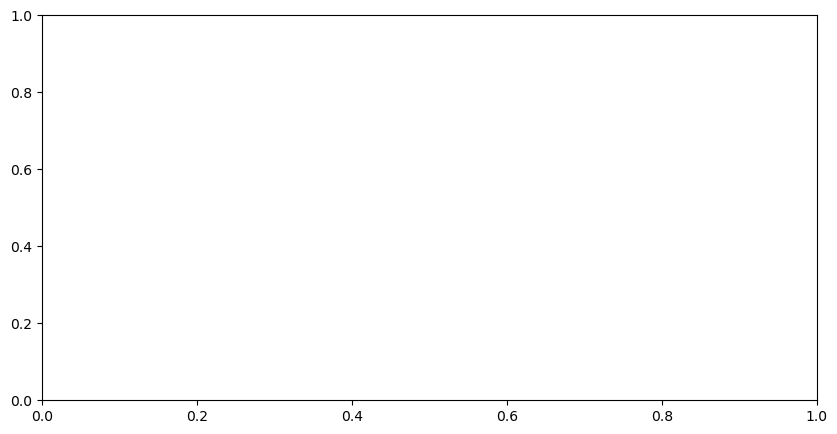

In [6]:
fig, ax = plt.subplots(figsize=(10, 5))

years = scatter_data['year'].unique()

colors =[f'C{i}' for i in np.arange(1, 6)]
cmap, norm = matplotlib.colors.from_levels_and_colors(np.arange(1, 5+2), colors)


label = ax.text(0.95, 0.25, years[0],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)


def update_scatter(i):

    year = years[i]

    data_temp = scatter_data.loc[scatter_data['year'] == year, :]
    ax.clear()
    label = ax.text(0.95, 0.20, years[i],
                horizontalalignment='right',
                verticalalignment='top',
                transform=ax.transAxes,
                fontdict=font)
    ax.scatter(
        data_temp['gdpPercap'],
        data_temp['lifeExp'],
        s=data_temp['pop']/500000, 
        alpha = 0.5, 
        c=data_temp.color, 
        cmap=cmap,
        norm=norm
    )

    label.set_text(year)

anim = animation.FuncAnimation(fig, update_scatter, frames = len(years), interval = 30)
anim.save('scatter.gif')  

In [13]:
df=pd.read_csv('ms.csv')
df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x87 in position 11030: invalid start byte

In [9]:
# Importing Libraries
import pandas as pd
import numpy as np
import streamlit as st
import plotly.express as px
import plotly.offline as py
from plotly.figure_factory import create_table

st.title("World Data")
st.markdown("This application is to analyze and visualize life expectancy,population and GDP worldwide from year 1952-2007.")
st.sidebar.title("World Data")

# Loading Data


@st.cache(persist=True)
def load_data():
  gapminder = px.data.gapminder()
  gapminder["lifeExp"] = gapminder["lifeExp"].round(3)
  gapminder["gdpPercap"] = gapminder["gdpPercap"].round(3)
  return gapminder


gapminder = load_data()

ModuleNotFoundError: No module named 'streamlit'

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def LotkaVolterra_EEuler(R0, F0, alpha, beta, gamma, delta, t):
# Solves Lotka-Volterra equations for one prey and one predator species using
# explicit Euler method.
#
#  R0 and F0 are inputs and are the initial populations of each species
#  alpha, beta, gamma, delta are inputs and problem parameters
#  t is an input and 1D NumPy array of t values where we approximate y values. 
#    Time step at each iteration is given by t[n+1] - t[n].

 R = np.zeros(len(t)) # Pre-allocate the memory for R
 F = np.zeros(len(t)) # Pre-allocate the memory for F

 R[0] = R0
 F[0] = F0

 for n in range(0,len(t)-1):
  dt = t[n+1] - t[n]
  R[n+1] = R[n]*(1 + alpha*dt - gamma*dt*F[n])
  F[n+1] = F[n]*(1 - beta*dt + delta*dt*R[n])
 return R,F
 
def main():
 # Main driver to organize the code better
 t = np.linspace(0,40,3201) # interval [0,40] with 3201 equispaced points
                            # as you increase the number of points the
                            # solution becomes more similar to the 
                            # reference solution on wikipedia

 # You should set the parameters below as in your problem
 # I am using the Baboon-Cheetah example from wikipedia
 alpha, beta, gamma, delta ,t= 1.1,0.4,0.4,0.1,0.2
 R0, F0 = 10, 10

 # Actually solve the problem
 R, F = LotkaVolterra_EEuler(R0, F0, alpha, beta, gamma, delta, t)

 # Plot the solution
 plt.plot(t,R,'b.-',t,F,'r-')
 plt.legend(['Baboon','Cheetah'])
 plt.grid(True)
 plt.title("Solution of Lotka-Volterra system using explicit Euler") 
 plt.show()


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from random import *
from numpy import *
import sys

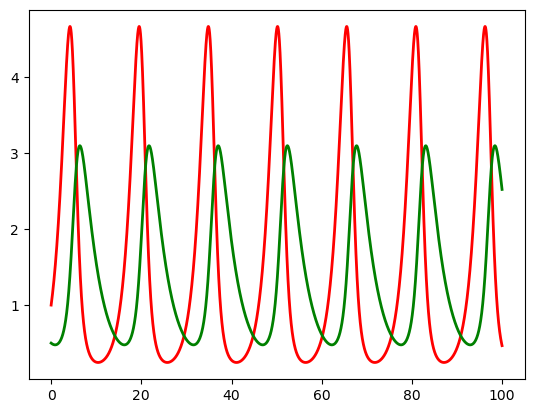

In [8]:
# model parameters
a = 0.7; b = 0.5; c = 0.3;  e = 0.2
dt = 0.001; max_time = 100

# initial time and populations
t = 0; x = 1.0; y = 0.5

# empty lists in which to store time and populations
t_list = []; x_list = []; y_list = []

# initialize lists
t_list.append(t); x_list.append(x); y_list.append(y)

while t < max_time:
    # calc new values for t, x, y
    t = t + dt
    x = x + (a*x - b*x*y)*dt
    y = y + (-c*y + e*x*y)*dt

    # store new values in lists
    t_list.append(t)
    x_list.append(x)
    y_list.append(y)

# Plot the results    
p = plt.plot(t_list, x_list, 'r', t_list, y_list, 'g', linewidth = 2)
plt.savefig('vot.png',dpi=300,bbox_inches='tight')

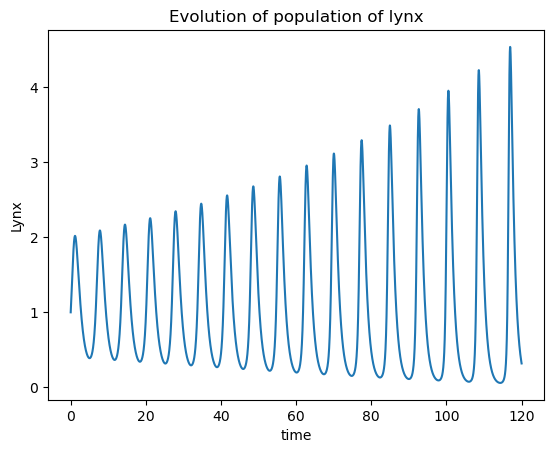

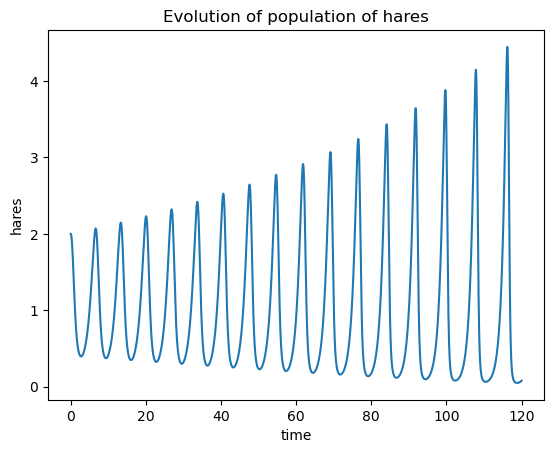

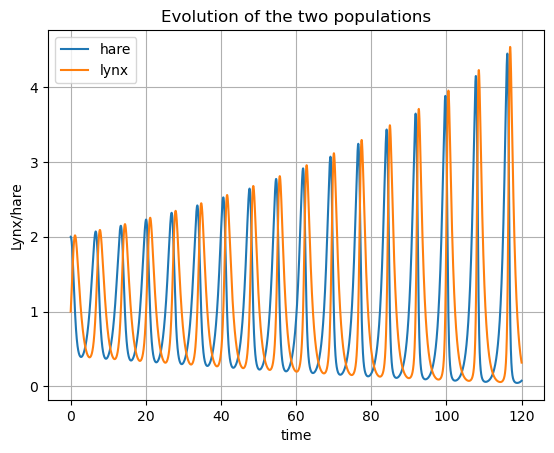

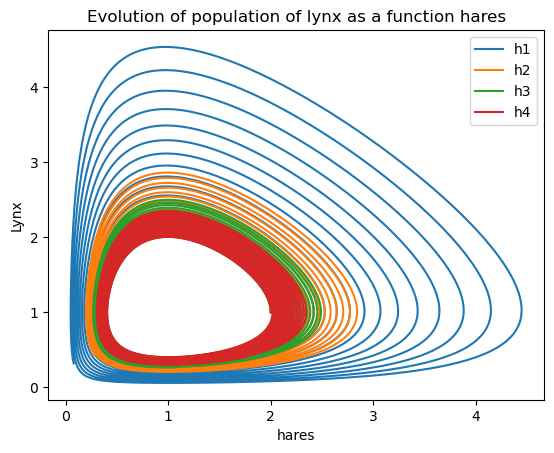

In [9]:
import matplotlib.pyplot as plt

def listes_euler_explicite(x0, y0, tmax, N):
    time = [0]
    hare = [x0]
    lynx = [y0]
    h = tmax / N
    for k in range(N):
        time.append((k+1) * h)
        xk1 = hare[k] + h*hare[k]*(1-lynx[k])
        yk1 = lynx[k] + h*lynx[k]*(hare[k]-1)
        hare.append(xk1)
        lynx.append(yk1)
    return (hare, lynx, time)

def draw_lynx(x0, y0, tmax, N):
  
    hare, lynx, time = listes_euler_explicite(x0, y0, tmax, N)
    plt.plot(time, lynx)
    plt.xlabel("time")
    plt.ylabel("Lynx")
    plt.title("Evolution of population of lynx")
    plt.show()

def draw_hare(x0, y0, tmax, N):
   
    hare, lynx, time = listes_euler_explicite(x0, y0, tmax, N)
    plt.plot(time, hare)
    plt.xlabel("time")
    plt.ylabel("hares")
    plt.title("Evolution of population of hares")
    plt.show()

def draw_both(x0, y0, tmax, N):

    hare, lynx, time = listes_euler_explicite(x0, y0, tmax, N)
    pl=plt.figure()
    plt.grid()
    plt.plot(time, hare, label = u"hare")
    plt.plot(time, lynx, label = u"lynx")
    plt.legend(loc='best')
    plt.xlabel('time')
    plt.ylabel('Lynx/hare')
    plt.title("Evolution of the two populations")
    plt.show()

def draw_lynx_hare(x0, y0, tmax, N):
    for i in range(1,5):
        hare, lynx, time = listes_euler_explicite(x0, y0, tmax, N*i)
        plt.plot(hare, lynx, label = f"h{i}")
    plt.legend(loc='best')
    plt.xlabel("hares")
    plt.ylabel("Lynx")
    plt.title("Evolution of population of lynx as a function hares")
    plt.show()

def draw_all(x0, y0, tmax, N):

    draw_lynx(x0, y0, tmax, N)
    draw_hare(x0, y0, tmax, N)
    draw_both(x0, y0, tmax, N)
    draw_lynx_hare(x0, y0, tmax, N)
draw_all(2,1,120,7000)

In [10]:
pip install py3Dmol

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [16]:
import py3Dmol
view = py3Dmol.view(query='pdb:4ey7')
view.setStyle({'cartoon':{'color':'spectrum'}})
view

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [3]:
df=pd.read_excel('logistic.xlsx')
df

Note: Plese don't change the values of this Sheet!  Unnamed: 1
0                                             Ribbon   420558456
1                                          Excel App   213983320
2                                       Excel Window     3612458
3                                     Excel Controls   800718616